In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset

file_path = '/content/Rotten_Tomatoes_Movies3.xls'
df = pd.read_excel(file_path)

In [ ]:
df.shape

(16638, 16)

In [ ]:
# Display the first few rows of the dataset
#print("Dataset Preview:")
print(df.head())

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly wri...     NR   
4  One of D

In [ ]:
# Data Exploration
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [ ]:
# Drop rows with missing target

print("\nMissing Values:\n", df.isnull().sum())
df = df.dropna(subset=['audience_rating'])


Missing Values:
 movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64


In [ ]:
# Exploratory Data Analysis
df.select_dtypes('object').nunique()

,0
movie_title,16106
movie_info,16613
critics_consensus,8307
rating,8
genre,1080
directors,8314
writers,12121
cast,16326
studio_name,2886
tomatometer_status,3


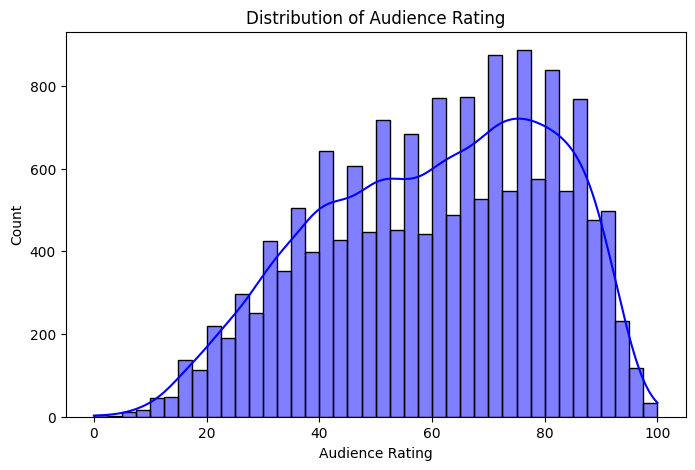

In [ ]:
# Visualize Audience Rating Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['audience_rating'], kde=True, color='blue')
plt.title('Distribution of Audience Rating')
plt.xlabel('Audience Rating')
plt.show()

In [ ]:
# Ensure 'directors' column has no NaN values and is treated as strings
df['directors'] = df['directors'].fillna('').astype(str)

# Calculate the number of directors for each movie
df['num_directors'] = df['directors'].apply(lambda x: len(x.split(',')))

# Movie with the highest number of directors
movie_with_max_directors = df[df["num_directors"] == df["num_directors"].max()]
print(movie_with_max_directors)

             movie_title                                         movie_info  \
2184     ABCs of Death 2  ABC's OF DEATH 2 is the follow-up to the most ...   
13653  The ABCs of Death  Twenty-six directors. Twenty-six ways to die. ...   

                                       critics_consensus rating  \
2184   ABCs of Death 2 delivers some inventively gory...     NR   
13653  As is often the case with anthology films, The...      R   

                            genre  \
2184                       Horror   
13653  Horror, Mystery & Suspense   

                                               directors writers  \
2184   Ahron Keshales, Navot Papushado, Bill Plympton...     NaN   
13653  Christopher Smith (VIII), Angela Bettis, Simon...     NaN   

                                                    cast in_theaters_date  \
2184   Beatrice Dalle, Victoria Broom, Andy Nyman, Ma...       2014-10-31   
13653  Ingrid Bolso Berdal, Neil Maskell, Kyra Zagors...       2013-03-08   

      on_st

Bar Chart for Number of Directors per Movie

In [ ]:
# Ensure 'cast' column has no NaN values and is treated as strings
df['cast'] = df['cast'].fillna('').astype(str)

# Number of actors in each movie
df['num_actors'] = df['cast'].apply(lambda x: len(x.split(',')))

# Movie with the highest number of actors
movie_with_max_actors = df[df["num_actors"] == df["num_actors"].max()]
print(movie_with_max_actors)

    movie_title                                         movie_info  \
912   Malcolm X  Writer-director Spike Lee's epic portrayal of ...   

                                     critics_consensus rating  genre  \
912  Anchored by a powerful performance from Denzel...  PG-13  Drama   

     directors                 writers  \
912  Spike Lee  Spike Lee, Arnold Perl   

                                                  cast in_theaters_date  \
912  Denzel Washington, Angela Bassett, Al Freeman ...       1992-11-18   

    on_streaming_date  runtime_in_minutes   studio_name tomatometer_status  \
912        2000-01-18               201.0  Warner Bros.    Certified Fresh   

     tomatometer_rating  tomatometer_count  audience_rating  num_directors  \
912                  88                 57             91.0              1   

     num_actors  
912         306  


rating
R         6136
NR        4862
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: count, dtype: int64


<ipython-input-23-defcde191b5f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette="viridis")


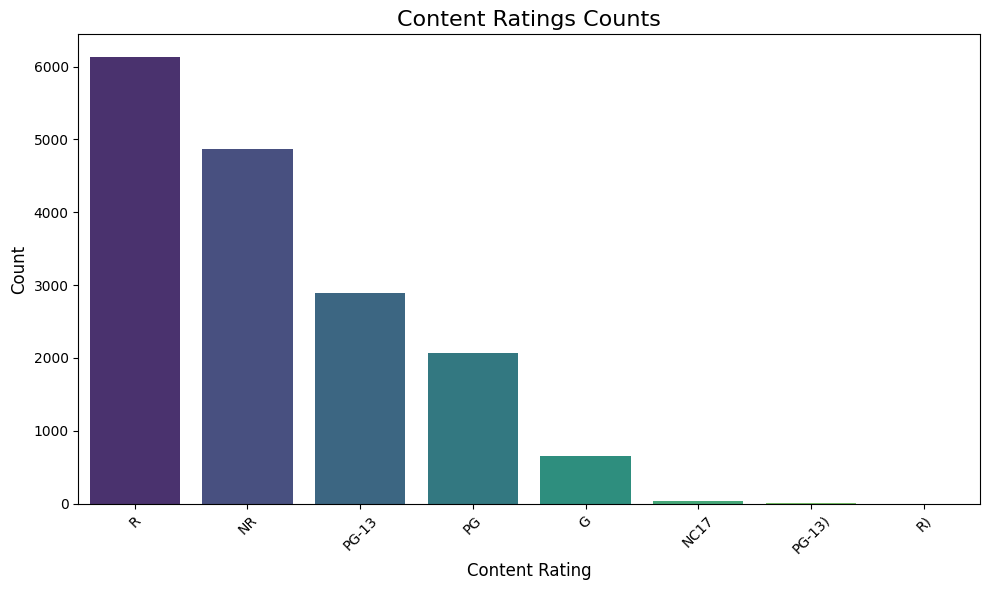

In [ ]:
# Handling Missing Values and Counting Content Ratings
df['rating'] = df['rating'].fillna('Unknown')

# Count the occurrences of each rating
print(df['rating'].value_counts())

# Visualize the content rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette="viridis")
plt.title('Content Ratings Counts', fontsize=16)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Split Features and Target
X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

In [ ]:
# Import required libraries

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Handle datetime columns and ensure proper types
for col in X.columns:
    if np.issubdtype(X[col].dtype, np.datetime64):
        X[col] = pd.to_datetime(X[col]).dt.year  # Extract year
    elif X[col].dtype == 'object':
        X[col] = X[col].astype(str)  # Ensure strings for categorical columns

# Identify Categorical and Numerical Columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing Pipeline with Imputation
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Impute numerical columns
        ('scaler', StandardScaler())]), num_cols),

    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute categorical columns
        ('onehot', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
])

# Define Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Custom Accuracy Function for Regression
def calculate_accuracy(y_true, y_pred, tolerance=0.1):
    """
    Custom accuracy: percentage of predictions within a certain tolerance.
    Args:
        y_true: Actual values.
        y_pred: Predicted values.
        tolerance: Error margin percentage.
    """
    within_tolerance = np.abs((y_true - y_pred) / y_true) <= tolerance
    accuracy = np.mean(within_tolerance) * 100
    return accuracy

# Train Models and Evaluate
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    accuracy = calculate_accuracy(y_test, y_pred)

    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'Accuracy': accuracy}

    print(f"{name} Results:")
    print(f"  - MAE: {mae:.2f}")
    print(f"  - RMSE: {rmse:.2f}")
    print(f"  - R² Score: {r2:.2f}")
    print(f"  - Accuracy: {accuracy:.2f}%\n")


Linear Regression Results:
  - MAE: 10.78
  - RMSE: 13.77
  - R² Score: 0.54
  - Accuracy: 36.30%

Random Forest Results:
  - MAE: 10.78
  - RMSE: 14.05
  - R² Score: 0.52
  - Accuracy: 38.74%



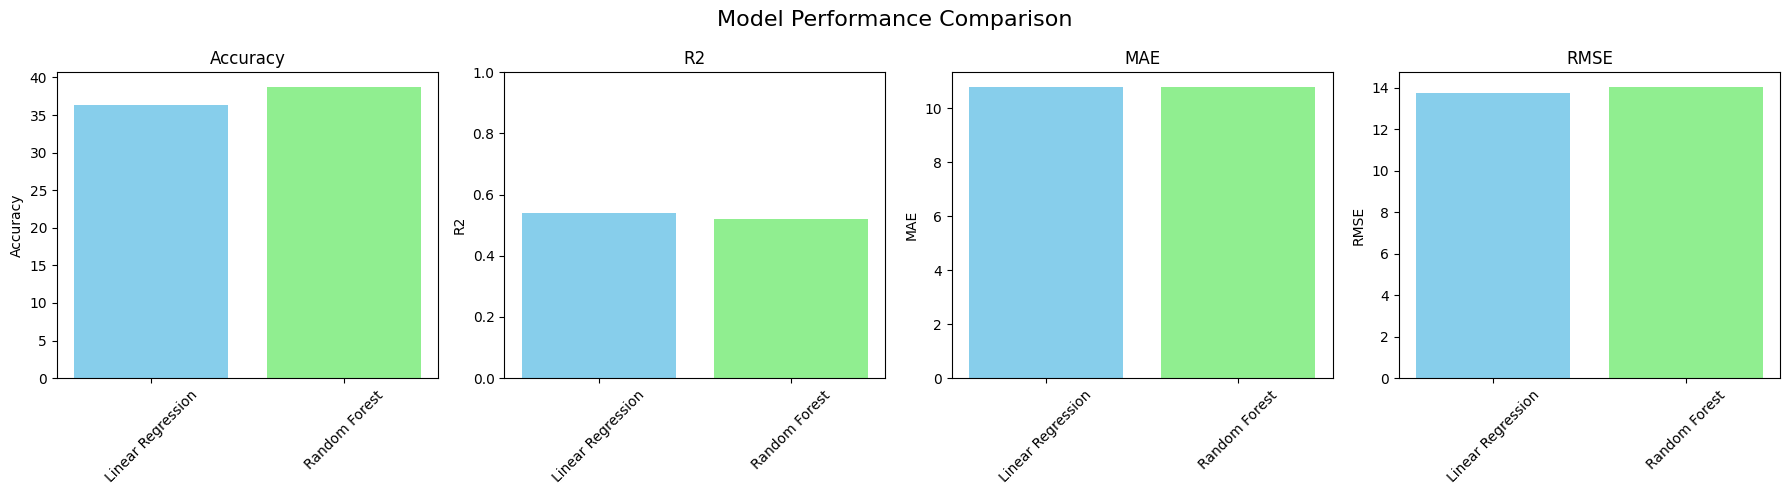

In [ ]:
# Visualization for Accuracy and R² Score

def plot_results(results):
    metrics = ['Accuracy', 'R2', 'MAE', 'RMSE']
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 5))
    fig.suptitle("Model Performance Comparison", fontsize=16)

    for i, metric in enumerate(metrics):
        values = [results[model][metric] for model in results.keys()]
        models = list(results.keys())

        axes[i].bar(models, values, color=['skyblue', 'lightgreen'])
        axes[i].set_title(metric)
        axes[i].set_ylabel(metric)
        axes[i].set_xticks(range(len(models)))
        axes[i].set_xticklabels(models, rotation=45)
        if metric == 'R2':  # R² scores are bounded
            axes[i].set_ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Plot the Results
plot_results(results)


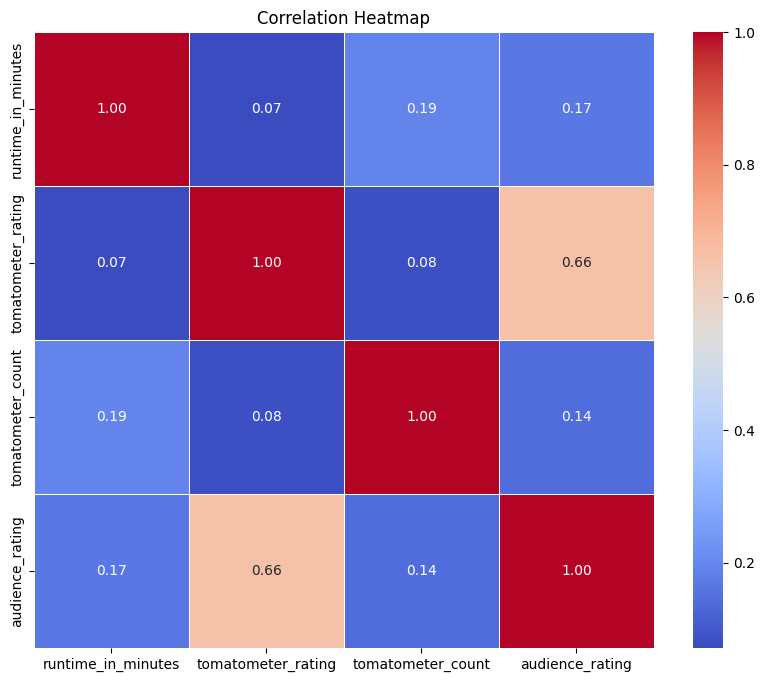

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check if numeric columns exist
if numeric_df.empty:
    print("No numeric columns available for correlation.")
else:
    # Compute the correlation matrix
    corr_matrix = numeric_df.corr()

    # Plot the correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()
